# **Portfolio Risk Report**  
### **Investment Risk 6-Month Internship (Full-Time) – Pictet Asset Management**  

## **Overview**  
This notebook serves as a demonstration of risk analysis techniques for equity portfolios, using the **internally developed** `risk_library`** developed in this project.  

1️⃣ **Data Retrieval and Preprocessing**: Using the `data_loader.py` module to fetch market data, process historical returns, and construct a portfolio with given weights.  

2️⃣ **Risk & Performance Evaluation**: Computing key portfolio metrics with the `risk_metrics.py` module, including **VaR, Conditional VaR (CVaR), Beta, Sharpe Ratio, Volatility, Maximum Drawdown, Tracking Error, and Marginal VaR contributions**.  
  
---

## Candidate Information  

**Name:** Martin Rodriguez  
**Email:** rodrima@usi.ch  
**Adress:** Geneva, Eaux-Vives, 1208 

### **Technical Skills**  
- **Python:** Experience in Object-Oriented Programming (OOP), working with APIs, developing web applications, multiprocessing, and handling large datasets.  
- **SQL:** Knowledge of database systems, SQL queries with Python (SQLite, MySQL), and efficiently retrieving and processing data from relational databases.  
- **Risk Management:** Understanding of portfolio risk metrics, factor analysis, and investment risk assessment.  
- **Data Processing:** Experience in cleaning, structuring, and analyzing financial datasets. 


---

## 1) Data Retrieval and Preprocessing  
### **Extracting Market Data for Portfolio Risk Analysis**


In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath("../scripts"))
from risk_library.data_loader import StockDataFetcher
import matplotlib.pyplot as plt
from risk_library.risk_metrics import RiskMetrics
from IPython.display import display
import seaborn as sns

In [2]:
fetcher = StockDataFetcher(
        tickers=["AAPL", "MSFT", "GOOGL", "UBS", "RHHBF","BAYN.DE","UBSG.SW","CS.PA","NOVN.SW","PEP"],
        start_date="2023-01-01",
        end_date="2024-01-01",
        weights=[0.15, 0.07, 0.3, 0.15, 0.1, 0.05, 0.05, 0.05, 0.03, 0.05], 
        benchmark_ticker="^GSPC"
        )

prices = fetcher.fetch_data()
portfolio_returns, benchmark_returns = fetcher.compute_portfolio_returns()

Fetching data for: ['AAPL', 'MSFT', 'GOOGL', 'UBS', 'RHHBF', 'BAYN.DE', 'UBSG.SW', 'CS.PA', 'NOVN.SW', 'PEP'] from 2023-01-01 to 2024-01-01


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed

Fetching benchmark data for: ^GSPC
Available columns in daily_returns: ['AAPL', 'BAYN.DE', 'CS.PA', 'GOOGL', 'MSFT', 'NOVN.SW', 'PEP', 'RHHBF', 'UBS', 'UBSG.SW']
Expected tickers: ['AAPL', 'MSFT', 'GOOGL', 'UBS', 'RHHBF', 'BAYN.DE', 'UBSG.SW', 'CS.PA', 'NOVN.SW', 'PEP']
Tickers found in data: ['AAPL', 'MSFT', 'GOOGL', 'UBS', 'RHHBF', 'BAYN.DE', 'UBSG.SW', 'CS.PA', 'NOVN.SW', 'PEP']



c:\Users\marti\Desktop\Internship\QUANT\Pictet\equities_investment_risk_project\scripts\risk_library\data_loader.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return self.data.pct_change().dropna()


### Retrieved Stock Prices


In [3]:
print("Stock Prices: ", prices.head(5))

Stock Prices:  Ticker            AAPL    BAYN.DE      CS.PA      GOOGL        MSFT  \
Date                                                                  
2023-01-02         NaN  47.316525  23.481457        NaN         NaN   
2023-01-03  123.632530  47.058407  23.636610  88.695953  235.240051   
2023-01-04  124.907707  47.345207  23.977949  87.660904  224.949890   
2023-01-05  123.583099  47.574638  23.711971  85.789841  218.282867   
2023-01-06  128.130219  48.325089  24.243927  86.924408  220.855408   

Ticker        NOVN.SW         PEP       RHHBF        UBS    UBSG.SW  
Date                                                                 
2023-01-02        NaN         NaN         NaN        NaN        NaN  
2023-01-03  72.442764  168.991730  361.203888  18.002813  16.805561  
2023-01-04  72.375244  168.577286  362.132446  18.695961  17.192545  
2023-01-05  71.657822  166.815857  351.909149  18.572525  17.201984  
2023-01-06  72.392120  170.583588  360.043182  18.885864  17.268057

### Daily Portfolio Returns

In [4]:
print("Daily Portfolio Returns: ", portfolio_returns.head(5))

Daily Portfolio Returns:  Date
2023-01-04    0.003044
2023-01-05   -0.014987
2023-01-06    0.018693
2023-01-09    0.006404
2023-01-10    0.002172
dtype: float64


### Daily Benchmark Returns

In [5]:
print("Daily Benchmark Returns: ", benchmark_returns.head(5))

Daily Benchmark Returns:  Ticker         ^GSPC
Date                
2023-01-04  0.007539
2023-01-05 -0.011646
2023-01-06  0.022841
2023-01-09 -0.000768
2023-01-10  0.006978


### **Portfolio Composition**

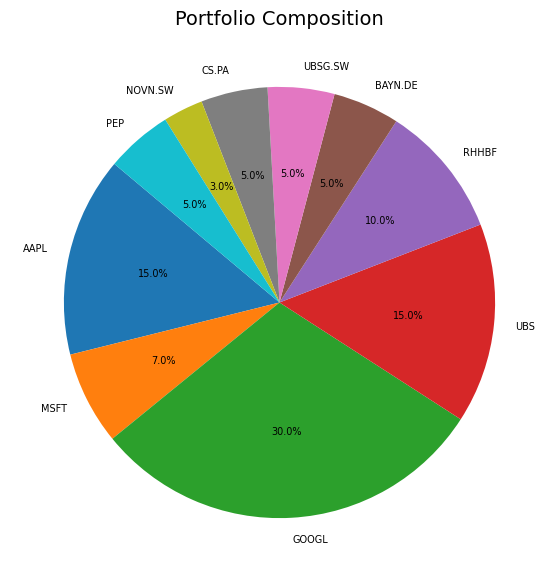

In [7]:
weights = fetcher.weights  
tickers = fetcher.tickers  

plt.figure(figsize=(10, 7))
plt.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
plt.title("Portfolio Composition", fontsize=14)
plt.show()

## 2) Risk & Performance Evaluation  
#### **Portfolio Risk Metrics Overview**

In [8]:
risk_metrics = RiskMetrics(portfolio_returns, benchmark_returns)

risk_data = {
    "Metric": [
        "Portfolio Volatility",
        "Value at Risk (VaR 95%)",
        "Sharpe Ratio",
        "Beta",
        "Maximum Drawdown",
        "Tracking Error"
    ],
    "Value": [
        risk_metrics.compute_volatility(),
        risk_metrics.compute_var(),
        risk_metrics.compute_sharpe_ratio(),
        risk_metrics.compute_beta(),
        risk_metrics.compute_max_drawdown(),
        risk_metrics.compute_tracking_error()
    ]
}

risk_df = pd.DataFrame(risk_data)
display(risk_df.style.hide(axis="index"))

Metric,Value
Portfolio Volatility,0.157577
Value at Risk (VaR 95%),-0.014846
Sharpe Ratio,0.126870
Beta,0.981205
Maximum Drawdown,-0.097192
Tracking Error,0.095461


##### **VaR 95% and Conditional VaR**

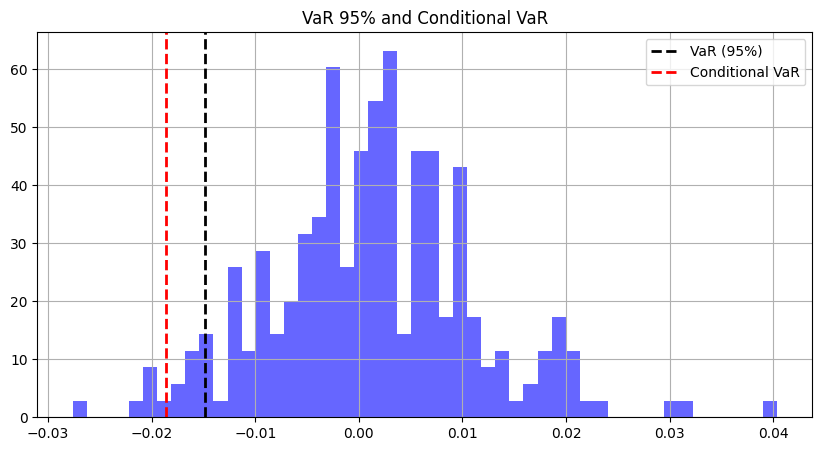

In [9]:
var_95 = np.percentile(portfolio_returns, 5)
expected_shortfall = portfolio_returns[portfolio_returns <= var_95].mean()

plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=50, alpha=0.6, color="blue", density=True)
plt.axvline(var_95, color='black', linestyle='dashed', linewidth=2, label="VaR (95%)")
plt.axvline(expected_shortfall, color='red', linestyle='dashed', linewidth=2, label="Conditional VaR")
plt.title("VaR 95% and Conditional VaR")
plt.legend()
plt.grid()
plt.show()

##### **Marginal VaR Contributions by Asset**

c:\Users\marti\Desktop\Internship\QUANT\Pictet\equities_investment_risk_project\scripts\risk_library\data_loader.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return self.data.pct_change().dropna()


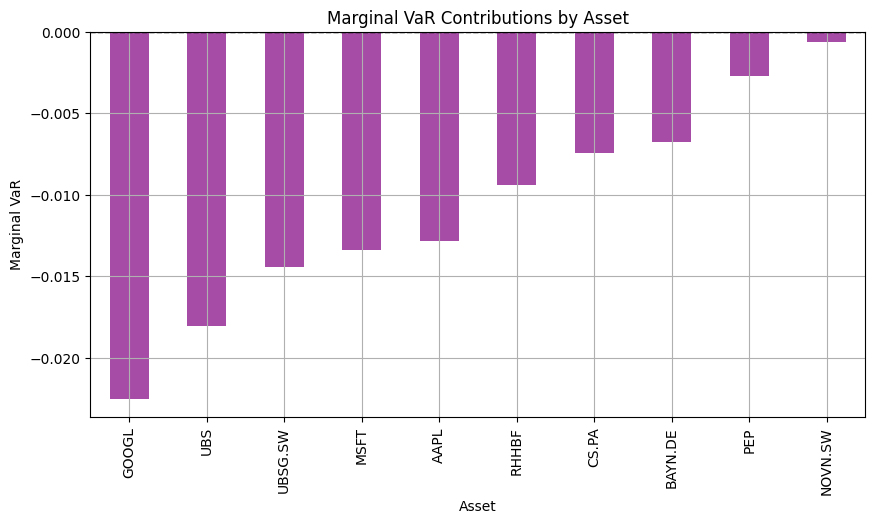

In [ ]:
asset_returns = fetcher.compute_daily_returns()

marginal_var = risk_metrics.compute_marginal_var(asset_returns)

plt.figure(figsize=(10,5))
marginal_var.sort_values().plot(kind='bar', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Marginal VaR Contributions by Asset")
plt.xlabel("Asset")
plt.ylabel("Marginal VaR")
plt.grid()
plt.show()

##### **Rolling Volatility (30-day)**

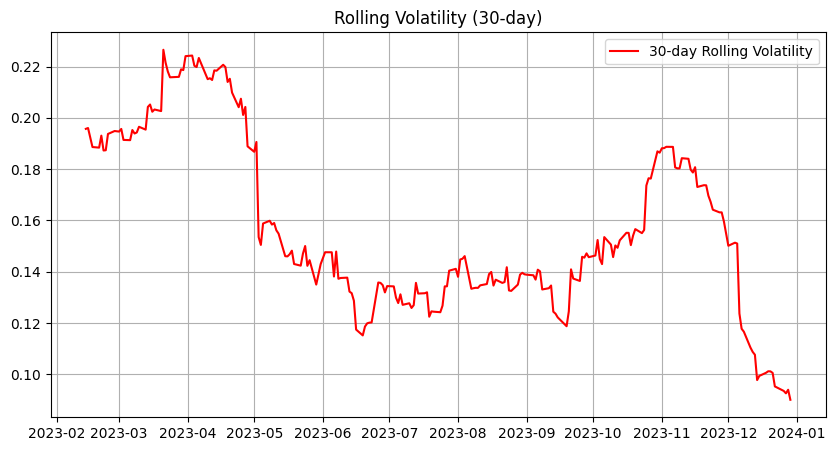

In [13]:
rolling_vol = portfolio_returns.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(10,5))
plt.plot(rolling_vol, label="30-day Rolling Volatility", color="red")
plt.title("Rolling Volatility (30-day)")
plt.legend()
plt.grid()
plt.show()

##### **Drawdown**

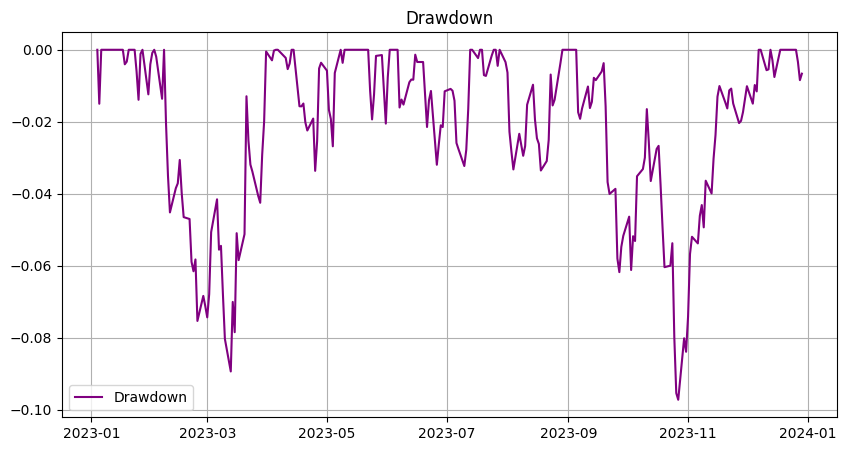

In [14]:
cumulative_returns = (1 + portfolio_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max

plt.figure(figsize=(10,5))
plt.plot(drawdown, label="Drawdown", color="purple")
plt.title("Drawdown")
plt.legend()
plt.grid()
plt.show()

### **Portfolio Performance Overview**

##### **Cumulative Returns**

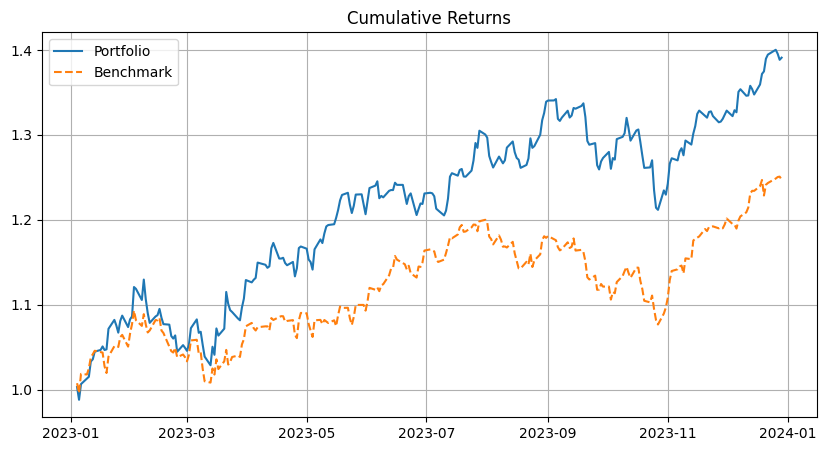

In [15]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_benchmark = (1 + benchmark_returns).cumprod()

plt.figure(figsize=(10,5))
plt.plot(cumulative_returns, label="Portfolio")
plt.plot(cumulative_benchmark, label="Benchmark", linestyle="--")
plt.title("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()